In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import scipy.optimize as opt
import qutip as qt
import numpy as np
from scipy.sparse.linalg import eigs
from os import listdir
from os.path import isfile, join
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

In [2]:
# define all the functions needed in the later calculations

def dominant_eigvals(L):
    L_sparse = L.data_as('csr_matrix')
    evals = eigs(L_sparse, k=20, which='LR', return_eigenvectors=False, ncv = 100)
    index = np.argsort(-evals)
    evals = evals[index]
    return evals

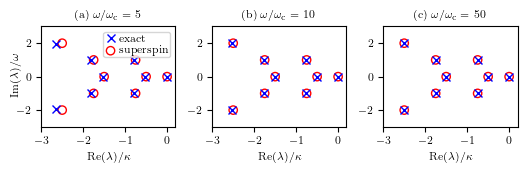

In [4]:
N=10
omega_c = N/2

S_x = qt.jmat(N/2, 'x')
S_y = qt.jmat(N/2, 'y')
S_z = qt.jmat(N/2, 'z')
S_p = qt.jmat(N/2, '+')
S_m = qt.jmat(N/2, '-')
idenJ = qt.qeye(S_z.shape[0])

fig , axs = plt.subplots(1,3, figsize=(1.5*3.54331,0.5*3.54331), layout='tight', width_ratios=[1,1,1])
i=0
labels = ['(a)', '(b)', '(c)']
for beta in [5,10,50]:
    omega = beta*omega_c
    Jump = S_m
    Ham = omega*S_x
    Liou = qt.liouvillian(Ham, [Jump])
    eigenvalues = dominant_eigvals(Liou)
    axs[i].plot(np.real(eigenvalues[0:9]), np.imag(eigenvalues[0:9])/omega, 'bx')
    for s in range(3):
        for s_x in range(-s,s+1):
            axs[i].scatter((-s_x**2 - s*(s+1))/4 , s_x, marker = 'o', facecolor='none',edgecolor='red')
    axs[i].set_title(labels[i] + r' $\omega/\omega_\mathrm{c}= $ '+str(beta), fontsize=8)
    axs[i].set_xlim(-3,0.2)
    axs[i].set_ylim(-3,3)
    axs[i].set_xlabel(r'$\mathrm{Re}(\lambda)/\kappa$')
    if i==0:
        axs[i].set_ylabel(r'Im$(\lambda)/\omega$')
        axs[i].yaxis.set_label_coords(-0.15,0.5)
        axs[i].legend(['exact', 'superspin'], fontsize=8, handlelength=1, handletextpad=0.3, labelspacing=0.2)
    i+=1
fig.savefig('eigenvalue_spectrum_superspin.pdf', dpi=1000)